In [7]:
from datasets import *

## 从 VisiumHD 生成 Visium
读取文件

In [2]:
path = '/data/datasets/Visium_HD_Human_Tonsil_Fresh_Frozen/binned_outputs/square_002um'
# path = '/mnt/TenTA-f702/user/zhangyichi/Data/Visium_HD_Human_Tonsil_Fresh_Frozen/binned_outputs/square_002um'
imagefile = '/data/datasets/Visium_HD_Human_Tonsil_Fresh_Frozen/Visium_HD_Human_Tonsil_Fresh_Frozen_tissue_image.tif'
# imagefile = '/mnt/TenTA-f702/user/zhangyichi/Data/Visium_HD_Human_Tonsil_Fresh_Frozen/Visium_HD_Human_Tonsil_Fresh_Frozen_tissue_image.tif'
rawdata = VisiumHDData()
rawdata.load(path=path, source_image_path=imagefile)

Start load
Finish load in 26.0809 s


In [3]:
visium_profile = VisiumProfile(slide_serial=4)

In [ ]:
emulate_visium = rawdata.HD2Visium(visium_profile)

In [5]:
save_path = Path('test/HD2Visium')
emulate_visium.save(save_path)

Start save
Finish save in 7.4856 s


## 使用 iStar 生成 Visium 的高分辨率图像 

In [2]:
visium_path = Path('test/HD2Visium')
iStar_visium = iStar()
iStar_visium.load(path=visium_path, source_image_path=visium_path/"image.tif")

In [3]:
mask = iStar_visium.tissue_mask(auto_mask=True)
iStar_visium.select_HVG(n_top_genes=2000)

In [4]:
iStar_visium.set_super_pixel_size(8)

In [3]:
istar_dir = Path("test/istar")
iStar_visium.save_inpout(istar_dir)

conda 环境切换到 iStar， 在 shell 下运行 iStar 工具

iStar 工具结束后读取结果

In [4]:
iStar_visium.load_output(istar_dir)

In [6]:
# iStar_visium.to_csv()
iStar_visium.to_h5ad()

Start to_h5ad


/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Finish to_h5ad in 0.8186 s


## 使用 iStar 从 Visium 生成 VisiumHD 数据

In [8]:
# visium_path = Path('test/HD2Visium')
visium_path = Path('/home/yiriso/Research/Super-resolvedST/data/DLPFC/sample_151673')
iStar_visium = iStar()
# iStar_visium.load(path=visium_path, source_image_path=visium_path/"image.tif")
iStar_visium.load(path=visium_path, source_image_path=visium_path/"151673_full_image.tif")
iStar_visium.tissue_mask(auto_mask=True)
iStar_visium.select_HVG(n_top_genes=2000)

Start load
Finish load in 0.4578 s


设定 VisiumHD 的配置

In [9]:
visiumHD_profile = VisiumHDProfile()
visiumHD_profile.reset(bin_size=8)

In [10]:
visiumHD_demo = iStar_visium.Visium2HD(HDprofile=visiumHD_profile)

In [12]:
iStar_visium.set_target_VisiumHD(visiumHD_demo)

In [13]:
istarHD_dir = Path("test/istar2HD")
iStar_visium.save_inpout(istarHD_dir)

Start convert
Finish convert


In [1]:
import cv2
import numpy as np
import imageio.v2 as ii
import matplotlib.pyplot as plt

from utility import *

In [2]:
A_points = np.array(
    [
        [0,0],
        [0,2],
        [2,2],
        [2,0],
    ]
)
B_points = np.array(
    [
        [0,0],
        [1,0],
        [1,1],
        [0,1],
    ]
)

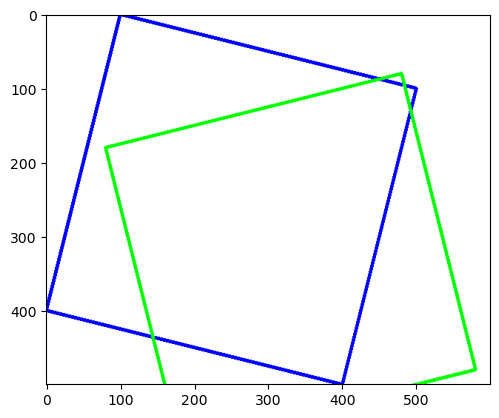

In [2]:
# 创建一张 500x500 的白色图像
image = np.ones((500, 600, 3), dtype=np.uint8) * 255

# 定义四边形顶点（顺序：左上、右上、右下、左下）
i = 100
pts = np.array([
    [100-i, 100],  # 左上
    [100, 400+i],  # 右上
    [400+i, 400],  # 右下
    [400, 100-i]   # 左下
], dtype="float32")
pts2 = pts + 80

# 在图像上绘制四边形轮廓（红色线条，粗细 3）
cv2.polylines(image, [pts[:,::-1].astype(np.int32)], isClosed=True, color=(0, 0, 255), thickness=4)
cv2.polylines(image,[pts2.astype(np.int32)], isClosed=True, color=(0, 255, 0), thickness=4)
plt.imshow(image)

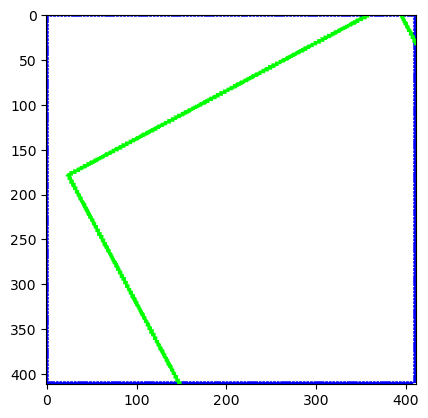

In [3]:
T = PerspectiveTransformer(image,pts)
img, _ = T.crop_image()
plt.imshow(img)

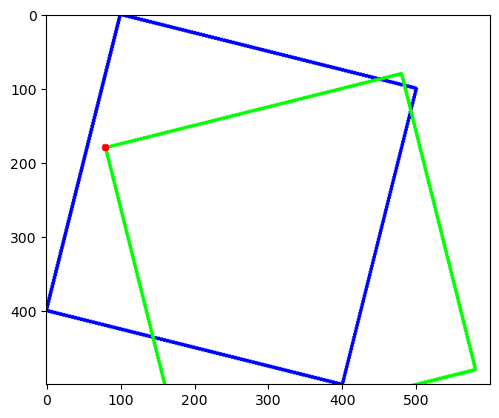

In [4]:
cv2.circle(image, [80,180], 5, (255, 0, 0), -1)
plt.imshow(image)

In [5]:
point = T.map_points(np.array([[80,180]]))[0]
point = np.round(point).astype(int)
point

array([ 24, 179])

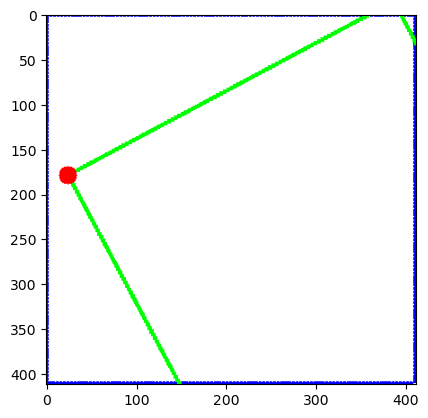

In [6]:
cv2.circle(img, point, 10, (255, 0,0), -1)
plt.imshow(img)